In [1]:
import re 
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

from nltk.corpus import stopwords
from collections import Counter
from PIL import Image
from nltk.stem.wordnet import WordNetLemmatizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette


import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation

from corextopic import corextopic as ct
from corextopic import vis_topic as vt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('CSV_Final_negative_la.csv')

## NLTK Stop words

In [28]:

stop_words = stopwords.words('english')

#stop_words.extend([])

In [29]:
type(stop_words)

list

## Vectorizing & Document Matrix

In [30]:
vectorizer = CountVectorizer(stop_words='english')

docs = vectorizer.fit_transform(df.comments)

features = vectorizer.get_feature_names()


In [31]:
vectorizer2 = CountVectorizer(stop_words='english')

docs2 = vectorizer2.fit_transform(df.comments)

features = vectorizer2.get_feature_names()

In [32]:

tf = TfidfVectorizer(stop_words=stopwords, min_df = 2, max_df=0.7)

docs = tf.fit_transform(df['comments'])

features = tf.get_feature_names()



"\ntf = TfidfVectorizer(stop_words=stopwords, min_df = 2, max_df=0.7)\n\ndocs = tf.fit_transform(df['comments'])\n\nfeatures = tf.get_feature_names()\n\n"

## Read samples of reviews

In [33]:
for sample in df['spacy_doc'].sample(5).values:
    print(sample)
    print()

Budget stay and close to everything. Only downside are thin walls.

House is a bit dirty and a bit dysfunctional.  The host a controlling individual who does not really seem willing to share the spaces being rented.

I left 45mins after check-in and booked a hotel. This place was not clean. Hair in shower and bed, Dirty used soap bar left on sink, food and trash behind dressers. Most importantly listing advertised a 5 step enhanced clean and Air bnb has Covid-19 precautions and requirements for listings that were not followed. Guests in common areas were not social distancing or wearing masks. When brought up to the host she mentioned that she does not require guests to wear masks in common areas and if that was my issue it will not be resolved.

PROS:<br/>Great communication<br/>Lots of space<br/>Very clean and quiet<br/>Strong water pressure<br/>Easy parking<br/>Good internet<br/>Nice that it's pet-friendly<br/><br/>CONS<br/>All the beds, chairs, and couches were very uncomfortable<b

In [87]:
for sample in df['comments'].sample(5).values:
    print(sample)
    print()

Overall this location is okay with the price, very noisy that you can hear people running up and down stairs and  cars running all night. All beds are very uncomfortable and you can feel the springs poking your back and if you tossing around too much, the bed can be break. One bedroom light is not working probably and bathroom lock is not locking, trash and very dusty underneath the bed. Overall, I am not feeling very comfortable stayed at this place, and I rather pay little extra for a better place.

The bedroom has an odor. The bed board doesn’t look clean. It has oily stains.The blankets smelled bad. The fan was noisy. The service was not great.

Convenient spot with plenty of privacy.  During my stay, there was an issue with the kitchen sink backing up - moreso just bad luck than a reflection on the guesthouse or its quality -  but shahla and her son were super-quick to respond and the situation sorted, without it impacting my stay.

John and Thipphawan were very nice and responded

## Most Used Words

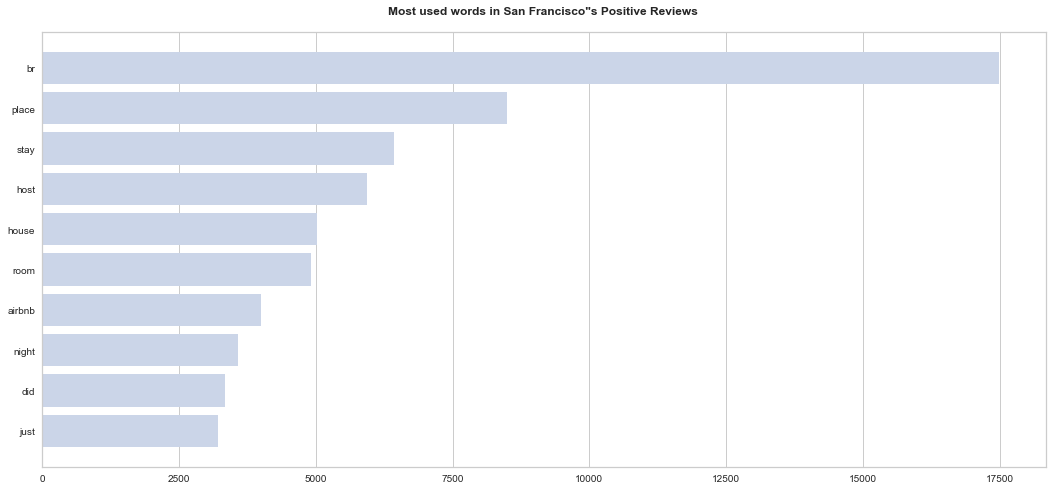

In [35]:
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.title('Most used words in San Francisco"s Positive Reviews \n', fontweight='bold')

##yellowbrick
vis = FreqDistVisualizer(features=features, n = 10)
vis.fit(docs)
vis.poof;

## Creating World Cloud words

In [36]:
def wordcloud_words(wordcloud):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(' San Francisco Negative Reviews\n', fontsize=18, fontweight='bold')
    plt.savefig('SFNegativeReviews')
    plt.show()

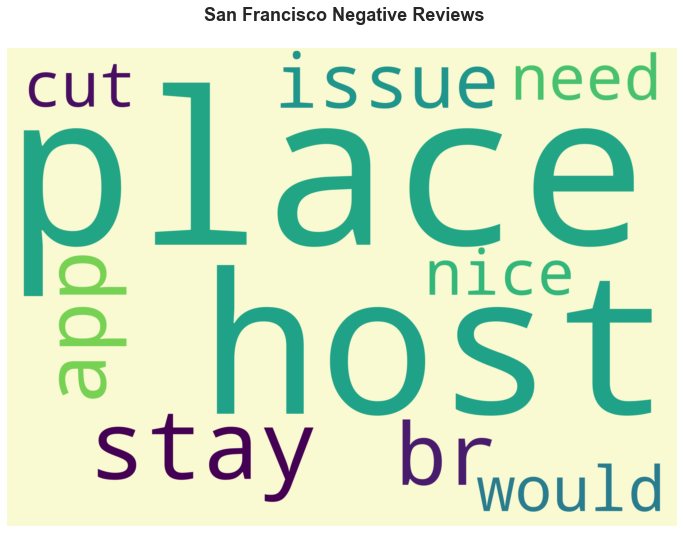

In [37]:
posWords = WordCloud(max_font_size=None, max_words = 10, background_color="lightgoldenrodyellow", 
                      width=3500, height=2500,
                      stopwords=stopwords.words('english')).generate(str(df.comments.values))

wordcloud_words(posWords)

## Simple Additional Cleaning

In [38]:
def clean(sents):
    for word in sents:
        word = re.sub('\s+', ' ', word)  
        word = re.sub("\'", "", word)  
        word = gensim.utils.simple_preprocess(str(word), deacc=True) 
        yield(word)  


# Apply cleaning

In [39]:
all_data = df.comments.values.tolist()
clean_sent = list(clean(all_data))
print(clean_sent[:1])

[['very', 'unreliable', 'host', 'br', 'br', 'wasnt', 'helpful', 'found', 'mold', 'in', 'the', 'bathroom', 'and', 'the', 'owner', 'blamed', 'it', 'on', 'me', 'when', 'it', 'is', 'lack', 'of', 'upkeep', 'of', 'his', 'property', 'very', 'rude', 'and', 'lazy', 'br', 'br', 'would', 'not', 'recommended', 'staying', 'here']]


In [40]:
print(clean_sent[:5])

[['very', 'unreliable', 'host', 'br', 'br', 'wasnt', 'helpful', 'found', 'mold', 'in', 'the', 'bathroom', 'and', 'the', 'owner', 'blamed', 'it', 'on', 'me', 'when', 'it', 'is', 'lack', 'of', 'upkeep', 'of', 'his', 'property', 'very', 'rude', 'and', 'lazy', 'br', 'br', 'would', 'not', 'recommended', 'staying', 'here'], ['unit', 'was', 'hot', 'ac', 'wasnt', 'great'], ['good', 'place', 'to', 'stay', 'close', 'to', 'marina', 'del', 'ray', 'venice', 'beach', 'santa', 'monica', 'the', 'house', 'is', 'poorly', 'isolated', 'so', 'you', 'need', 'to', 'heat', 'it', 'more', 'than', 'what', 'should', 'be', 'necessary', 'during', 'the', 'nights', 'only', 'mugs', 'to', 'do', 'the', 'second', 'in', 'bnb', 'breakfast', 'no', 'bowls', 'for', 'cereal', 'no', 'cutting', 'board', 'to', 'cut', 'your', 'bread', 'on', 'etc', 'which', 'was', 'disappointing', 'otherwise', 'nice', 'place', 'you', 'need', 'an', 'uber', 'account', 'to', 'travel', 'to', 'most', 'things'], ['this', 'was', 'my', 'second', 'stay', 'f

## Bigram & Trigram

In [41]:

bi_gram = gensim.models.Phrases(clean_sent, min_count=5, threshold=100) 

tri_gram = gensim.models.Phrases(bi_gram[clean_sent], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(bi_gram)

trigram_mod = gensim.models.phrases.Phraser(tri_gram)

## Clean, Remove & Lemma

In [42]:

def cleaning(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
       
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    
    nlp = spacy.load("en_core_web_sm")
    
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])     
    
    clean_text = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]
    
    return clean_text


## Apply final cleaning on prev cleaned list

In [43]:
doc_clean = cleaning(clean_sent)
doc_clean[:5]

[['unreliable',
  'host',
  'br',
  'helpful',
  'find',
  'mold',
  'bathroom',
  'owner',
  'blame',
  'lack',
  'upkeep',
  'property',
  'rude',
  'lazy',
  'recommend',
  'stay'],
 ['unit', 'hot', 'great'],
 ['good',
  'place',
  'stay',
  'close',
  'marina_del_ray',
  'venice_beach',
  'house',
  'poorly',
  'isolate',
  'need',
  'heat',
  'necessary',
  'night',
  'mug',
  'second',
  'bnb',
  'breakfast',
  'bowl',
  'cereal',
  'cutting_board',
  'cut',
  'bread',
  'disappointing',
  'otherwise',
  'nice',
  'place',
  'need',
  'uber',
  'account',
  'travel',
  'thing'],
 ['second',
  'stay',
  'first',
  'hobbit',
  'zen',
  'room',
  'br',
  'amazing',
  'bad',
  'thing',
  'say',
  'continue',
  'come',
  'back',
  'recommend'],
 ['resist', 'urge', 'spin', 'bed', 'long', 'time', 'get', 'dizzy']]

## Create Dictionary & Corpus

In [44]:
doc_dict = corpora.Dictionary(doc_clean)

corpus = [doc_dict.doc2bow(text) for text in doc_clean]


## Build The LDA model

In [45]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=doc_dict,num_topics=8, random_state=33,
                                           update_every=1,chunksize=15,passes=10,alpha='symmetric',iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.049*"br" + 0.034*"place" + 0.025*"parking" + 0.025*"location" + '
  '0.022*"bathroom" + 0.021*"stay" + 0.017*"clean" + 0.017*"night" + '
  '0.016*"unit" + 0.016*"nice"'),
 (1,
  '0.097*"host" + 0.063*"check" + 0.047*"time" + 0.042*"stay" + 0.032*"book" + '
  '0.032*"get" + 0.025*"go" + 0.023*"guest" + 0.021*"know" + '
  '0.018*"uncomfortable"'),
 (2,
  '0.076*"property" + 0.061*"owner" + 0.052*"communication" + 0.039*"rude" + '
  '0.024*"quite" + 0.022*"lack" + 0.021*"service" + 0.017*"meet" + '
  '0.017*"recommend" + 0.016*"description"'),
 (3,
  '0.055*"airbnb" + 0.050*"bad" + 0.038*"tell" + 0.037*"room" + 0.036*"people" '
  '+ 0.023*"also" + 0.022*"give" + 0.022*"car" + 0.021*"experience" + '
  '0.021*"overall"'),
 (4,
  '0.039*"day" + 0.033*"leave" + 0.022*"even" + 0.021*"ask" + 0.019*"hour" + '
  '0.018*"call" + 0.017*"refund" + 0.016*"next" + 0.016*"pay" + 0.015*"want"'),
 (5,
  '0.039*"apartment" + 0.030*"list" + 0.025*"picture" + 0.020*"issue" + '
  '0.019*"small" + 0

## List of words by topic

In [46]:
topics = lda_model.show_topics(formatted=False)

In [47]:
type(topics)

list

In [48]:
topics

[(0,
  [('br', 0.04906773),
   ('place', 0.034309108),
   ('parking', 0.02527965),
   ('location', 0.024618706),
   ('bathroom', 0.022106523),
   ('stay', 0.020566149),
   ('clean', 0.016865468),
   ('night', 0.016552314),
   ('unit', 0.01648807),
   ('nice', 0.01624896)]),
 (1,
  [('host', 0.09699859),
   ('check', 0.063335165),
   ('time', 0.047027677),
   ('stay', 0.04213288),
   ('book', 0.03195334),
   ('get', 0.03189986),
   ('go', 0.025483634),
   ('guest', 0.023360448),
   ('know', 0.020732926),
   ('uncomfortable', 0.017566545)]),
 (2,
  [('property', 0.07593966),
   ('owner', 0.061182465),
   ('communication', 0.05209596),
   ('rude', 0.038656775),
   ('quite', 0.023654224),
   ('lack', 0.02249974),
   ('service', 0.02126602),
   ('meet', 0.017029472),
   ('recommend', 0.016828775),
   ('description', 0.016055614)]),
 (3,
  [('airbnb', 0.05492685),
   ('bad', 0.05045411),
   ('tell', 0.037950534),
   ('room', 0.036716927),
   ('people', 0.0356079),
   ('also', 0.023032598),
 

## Visualize the words By Topic

In [49]:
#topics = lda_model.show_topics(formatted=False)

In [50]:
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

In [51]:
words_tops = []

for i, topic in topics:
    for word, weight in topic:
        words_tops.append([word, i , weight, counter[word]])
        

df_f = pd.DataFrame(words_tops, columns=['word', 'topic_n', 'most_appear', 'word_count']) 

In [52]:
df_f.sort_values('most_appear', ascending=False).head(12)

,word,topic_n,most_appear,word_count
10,host,1,0.096999,6589
20,property,2,0.075940,1511
11,check,1,0.063335,3296
21,owner,2,0.061182,996
30,airbnb,3,0.054927,2964
22,communication,2,0.052096,825
31,bad,3,0.050454,2695
0,br,0,0.049068,6811
12,time,1,0.047028,3391
70,reservation,7,0.046910,549


## Word Count as Weights by Topic Visualization

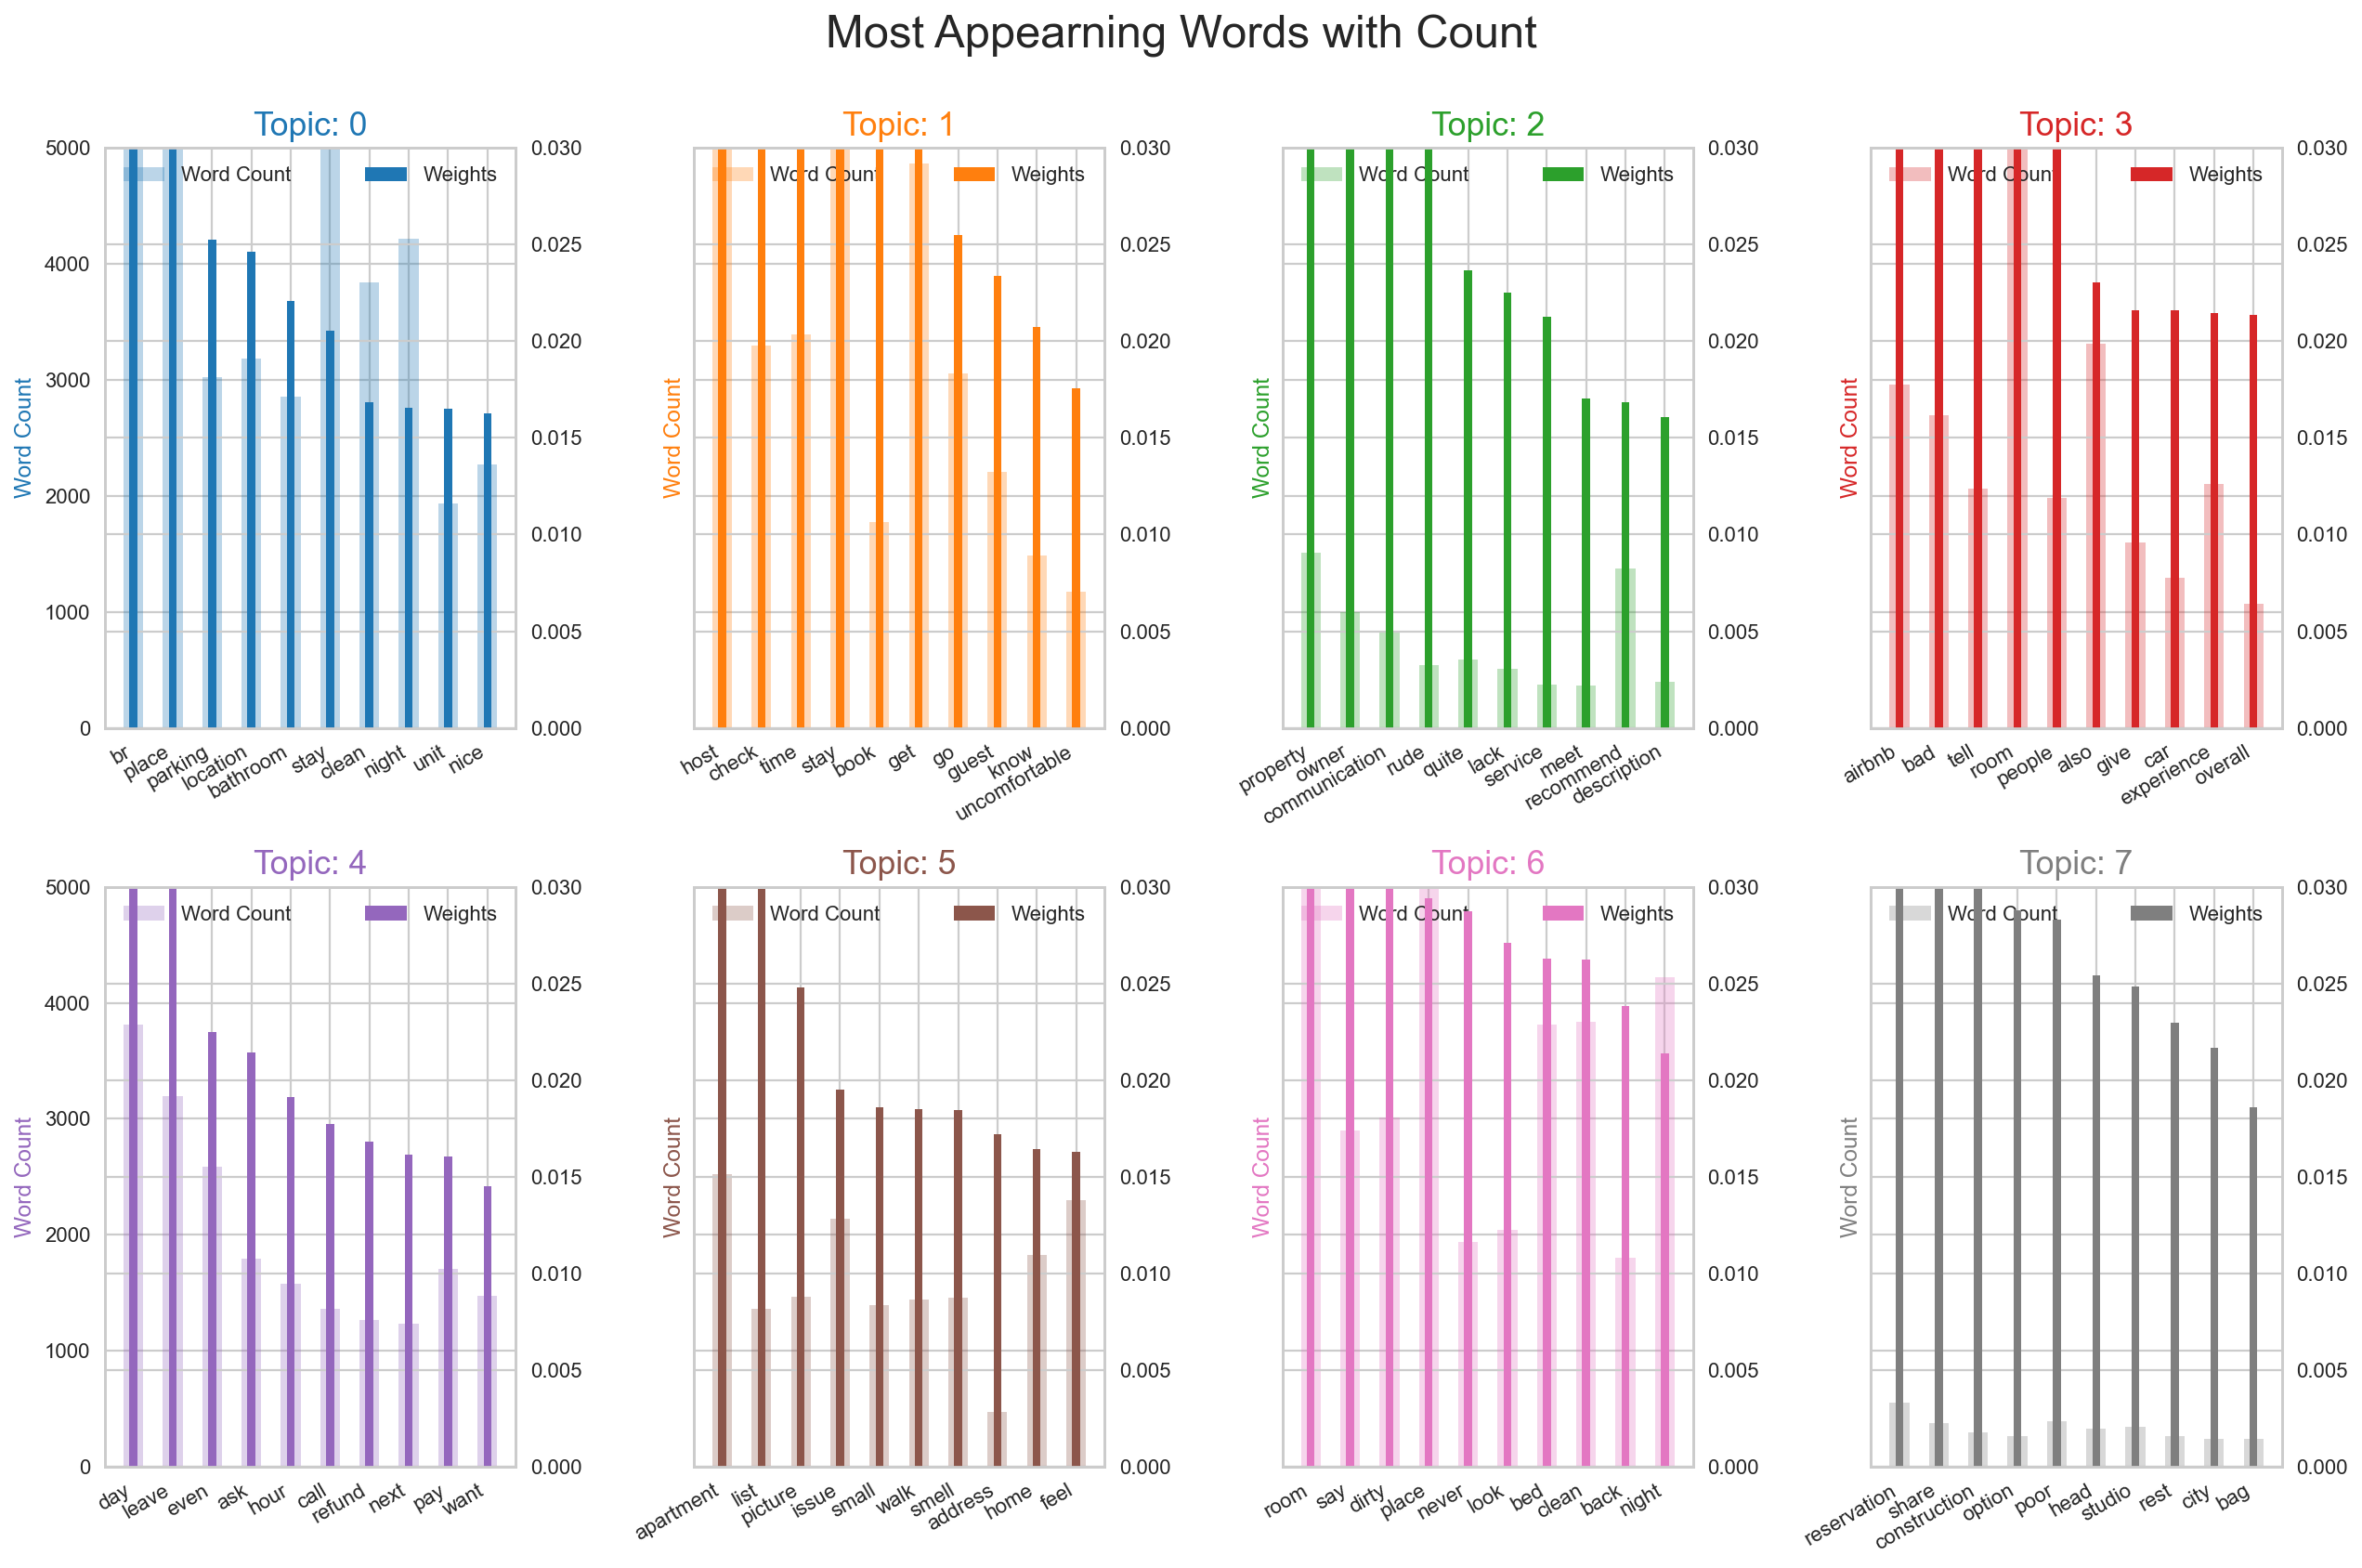

In [53]:
fig, axes = plt.subplots(2, 4, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data = df_f.loc[df_f.topic_n==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    
    ax_twin.bar(x='word', height="most_appear", data = df_f.loc[df_f.topic_n==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 5000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    
    ax.set_xticklabels(df_f.loc[df_f.topic_n==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Most Appearning Words with Count', fontsize=22, y=1.05)   

plt.show()

## Words by Topic WordCloud

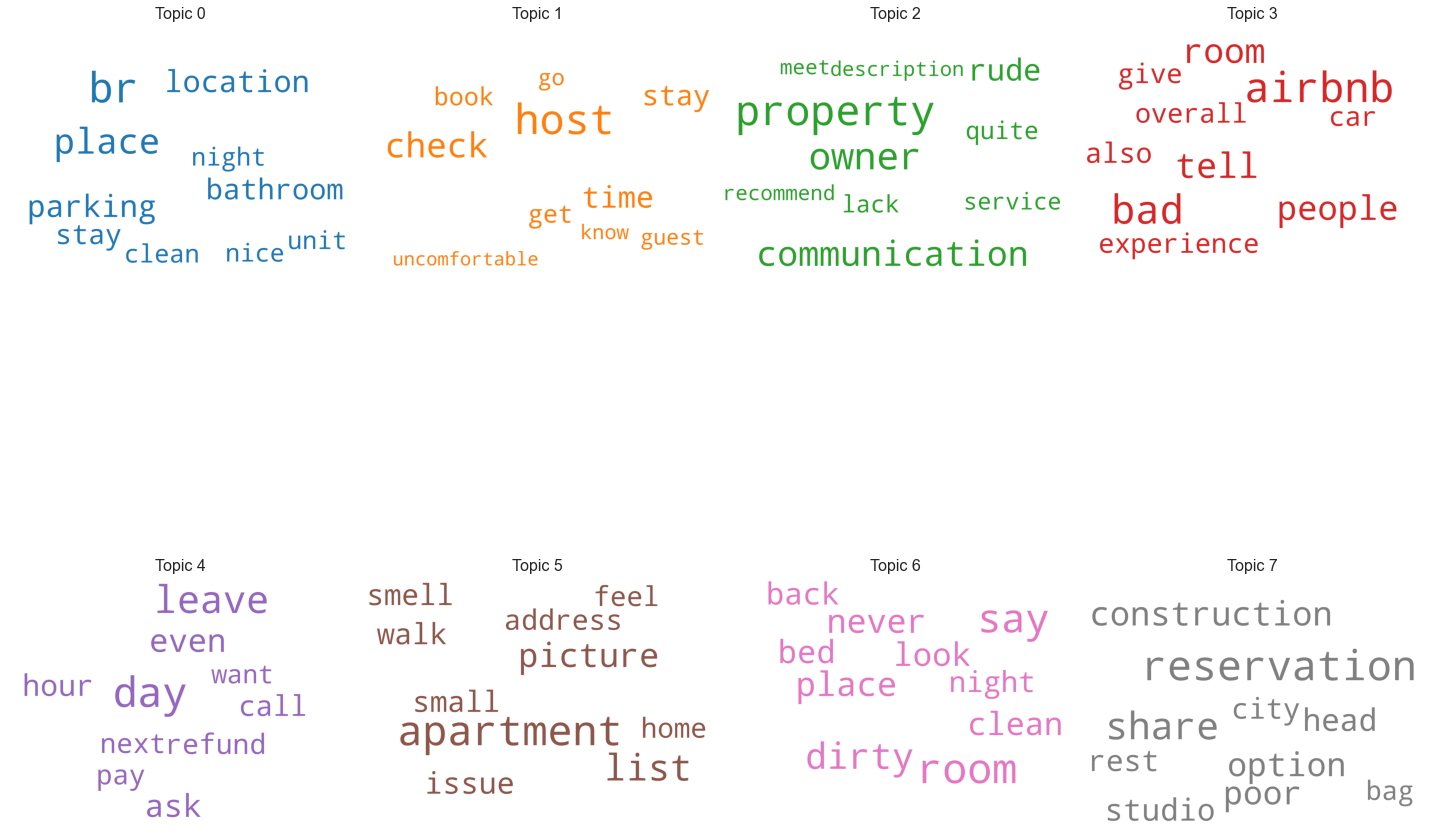

In [54]:
colors2 = [color for name, color in mcolors.TABLEAU_COLORS.items()] 

topic_clouds = WordCloud(stopwords=stop_words,background_color='white', width=2500,height=1800, max_words=25, colormap='tab10',
                  color_func=lambda *args, **kwargs: colors2[i],prefer_horizontal=1.0)


fig, axes = plt.subplots(2, 4, figsize=(20,20), sharex=True, sharey=True)
 

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    
    topic_words = dict(topics[i][1])
    topic_clouds.generate_from_frequencies(topic_words, max_font_size=300)
    
    plt.gca().imshow(topic_clouds)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

##  NMF run using 3 topics

In [55]:

nmf = NMF(n_components=3)

nmf.fit(docs)

NMF(n_components=3)

In [56]:
topic_matrix = nmf.transform(docs)

In [57]:
topic_matrix_df = pd.DataFrame(topic_matrix).add_prefix('topic_')

topic_matrix_df['comments'] = df['comments']
topic_matrix_df.head()

,topic_0,topic_1,topic_2,comments
0,0.181304,0.000000,0.049804,NaN
1,0.000496,0.015217,0.003123,"very unreliable host, <br/><br/>Wasn't helpfu..."
2,0.000000,0.123907,0.000000,Unit was hot. AC wasn't great.
3,0.090608,0.020718,0.013319,NaN
4,0.000389,0.016347,0.003999,NaN


In [58]:
word_topic_matrix_df = pd.DataFrame(nmf.components_, columns=features).T.add_prefix('topic_')
word_topic_matrix_df.head()

,topic_0,topic_1,topic_2
00,0.000334,0.047987,0.128804
000,0.001307,0.005598,0.044459
0000am,0.000000,0.000384,0.000000
001,0.000000,0.000654,0.000000
00am,0.000000,0.001464,0.013257


## Read Samples from Topic 0 

In [59]:
for review in topic_matrix_df.sort_values(by='topic_0', ascending=False).head(10)['comments'].values:
    print(review)
    print()

nan

Pretty view but the refrigerator was broken our entire stay and he still charged $150 for my mother and father to bring us food one day and eat on the beach. It was incredibly inconvenient to keep our food in the freezer not to mention the smell of a broken fridge all week. It would’ve been nice to comp 2 guests that came for an hour (they charge 75$ a person)  Although he offered to have repair men come to fix the fridge that didn’t work for us with covid. The jets in the spa tub were also broken. Nice beach! Tiny balcony.

nan

nan

nan

if you wabt to be close to venice beach this is the place to stay. walking distance from musle beach. has the amenities you need no frills but just right for me!! i would stay here again

The location was a bit bad and kind of scary since everywhere near this room was construction site

nan

nan

nan



## Read Samples from Topic 1 


In [60]:
for review in topic_matrix_df.sort_values(by='topic_1', ascending=False).head(5)['comments'].values:
    print(review)
    print()

2Best is a very nice host and so was his friend Steve, but his ad is dishonest. His place is filthy and it is infested with roaches. I was inconvenienced in a major way because I had to move to a hotel because I couldn't book another Airbnb on the same day that I checked into that one.  On top of that, the toilet didn't flush properly and it was just a bad experience all around. I feel bad writing this review, but it's the truth and I don't want anyone else to experience the drama and trauma that I did.  My hope is that 2Best will be honest with himself about his home. He needs to fix his roach problem before renting out anymore rooms. Roaches are filthy creatures and they carry disease. Someone could become very sick if he's not careful.

We like the view but so many issues. It’s very scary to drive to this house. One way narrow road with a steep drop off the cliff. We were taking Ubers and we heard about scary accidents where people drove off the cliff. Multiple times we were stuck a

## Read Samples from Topic 2


In [61]:
for review in topic_matrix_df.sort_values(by='topic_2', ascending=False).head(5)['comments'].values:
    print(review)
    print()

Pretty view but the refrigerator was broken our entire stay and he still charged $150 for my mother and father to bring us food one day and eat on the beach. It was incredibly inconvenient to keep our food in the freezer not to mention the smell of a broken fridge all week. It would’ve been nice to comp 2 guests that came for an hour (they charge 75$ a person)  Although he offered to have repair men come to fix the fridge that didn’t work for us with covid. The jets in the spa tub were also broken. Nice beach! Tiny balcony.

nan

nan

This is one of the worst Airbnb’s I’ve ever been to. We drove up to the Airbnb and when we asked if this was the right place,  a teenage boy gave us an attitude and laughed. He said “yeah,” and refused to give us any direction on where to proceed. We booked our trip for 16 days and for the first 5 days it was over 110 degrees outside and the host kept promising air conditioning but never followed through. The fridge hardly works, so the items that we purc

# Top 10 Words from Each Topic

In [62]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [63]:
display_topics(nmf, features, 10)


Topic  0
br, house, room, kitchen, bedroom, unit, bed, broken, dirty, bathroom

Topic  1
place, room, house, stay, just, dirty, night, bed, clean, bathroom

Topic  2
host, airbnb, did, stay, check, day, said, refund, time, told


In [64]:
word_topic_matrix_df.sort_values(by='topic_0', ascending=False).head(10)

,topic_0,topic_1,topic_2
br,21.894987,0.000000,0.000000
house,0.431033,3.921629,0.680117
room,0.419648,4.179959,0.000000
kitchen,0.352938,1.671171,0.000000
bedroom,0.293140,0.963477,0.000000
unit,0.289496,0.645655,1.031699
bed,0.286590,2.200093,0.043233
broken,0.281207,0.847448,0.068376
dirty,0.271133,2.328606,0.000000
bathroom,0.270062,2.103071,0.000000


In [65]:
word_topic_matrix_df.sort_values(by='topic_1', ascending=False).head(10)

,topic_0,topic_1,topic_2
place,0.000000,6.818369,0.000000
room,0.419648,4.179959,0.000000
house,0.431033,3.921629,0.680117
stay,0.240536,3.650155,2.475229
just,0.131910,2.427657,0.890704
dirty,0.271133,2.328606,0.000000
night,0.202374,2.319097,1.097073
bed,0.286590,2.200093,0.043233
clean,0.141033,2.106885,0.004957
bathroom,0.270062,2.103071,0.000000


In [66]:
word_topic_matrix_df.sort_values(by='topic_2', ascending=False).head(10)

,topic_0,topic_1,topic_2
host,0.000000,0.000000,8.565486
airbnb,0.268510,0.000000,5.769310
did,0.110877,1.575068,2.505963
stay,0.240536,3.650155,2.475229
check,0.121097,0.609313,2.016573
day,0.166912,1.359540,1.705153
said,0.083578,0.603930,1.642936
refund,0.000000,0.088521,1.598569
time,0.236990,1.479263,1.567714
told,0.000000,0.708436,1.438027


In [67]:
def top_reviews(topic_matrix_df, topic, num_of_reviews):
    return (topic_matrix_df
            .sort_values(by=topic, ascending=False)
            .head(num_of_reviews)['comments']
            .values)

def top_words(word_topic_matrix_df, topic, n_of_words):
    return (word_topic_matrix_df
            .sort_values(by=topic, ascending=False)
            .head(n_of_words))[topic]

In [68]:
for review in top_reviews(topic_matrix_df, 'topic_0', 5):
    print(review)
    print()

nan

Pretty view but the refrigerator was broken our entire stay and he still charged $150 for my mother and father to bring us food one day and eat on the beach. It was incredibly inconvenient to keep our food in the freezer not to mention the smell of a broken fridge all week. It would’ve been nice to comp 2 guests that came for an hour (they charge 75$ a person)  Although he offered to have repair men come to fix the fridge that didn’t work for us with covid. The jets in the spa tub were also broken. Nice beach! Tiny balcony.

nan

nan

nan



In [69]:
top_words(word_topic_matrix_df, 'topic_0', 10)

br          21.894987
house        0.431033
room         0.419648
kitchen      0.352938
bedroom      0.293140
unit         0.289496
bed          0.286590
broken       0.281207
dirty        0.271133
bathroom     0.270062
Name: topic_0, dtype: float64

In [70]:
for review in top_reviews(topic_matrix_df, 'topic_1', 5):
    print(review)
    print()

2Best is a very nice host and so was his friend Steve, but his ad is dishonest. His place is filthy and it is infested with roaches. I was inconvenienced in a major way because I had to move to a hotel because I couldn't book another Airbnb on the same day that I checked into that one.  On top of that, the toilet didn't flush properly and it was just a bad experience all around. I feel bad writing this review, but it's the truth and I don't want anyone else to experience the drama and trauma that I did.  My hope is that 2Best will be honest with himself about his home. He needs to fix his roach problem before renting out anymore rooms. Roaches are filthy creatures and they carry disease. Someone could become very sick if he's not careful.

We like the view but so many issues. It’s very scary to drive to this house. One way narrow road with a steep drop off the cliff. We were taking Ubers and we heard about scary accidents where people drove off the cliff. Multiple times we were stuck a

In [71]:
top_words(word_topic_matrix_df, 'topic_1', 10)

place       6.818369
room        4.179959
house       3.921629
stay        3.650155
just        2.427657
dirty       2.328606
night       2.319097
bed         2.200093
clean       2.106885
bathroom    2.103071
Name: topic_1, dtype: float64

In [72]:
for review in top_reviews(topic_matrix_df, 'topic_2', 5):
    print(review)
    print()

Pretty view but the refrigerator was broken our entire stay and he still charged $150 for my mother and father to bring us food one day and eat on the beach. It was incredibly inconvenient to keep our food in the freezer not to mention the smell of a broken fridge all week. It would’ve been nice to comp 2 guests that came for an hour (they charge 75$ a person)  Although he offered to have repair men come to fix the fridge that didn’t work for us with covid. The jets in the spa tub were also broken. Nice beach! Tiny balcony.

nan

nan

This is one of the worst Airbnb’s I’ve ever been to. We drove up to the Airbnb and when we asked if this was the right place,  a teenage boy gave us an attitude and laughed. He said “yeah,” and refused to give us any direction on where to proceed. We booked our trip for 16 days and for the first 5 days it was over 110 degrees outside and the host kept promising air conditioning but never followed through. The fridge hardly works, so the items that we purc

In [73]:
top_words(word_topic_matrix_df, 'topic_2', 10)

host      8.565486
airbnb    5.769310
did       2.505963
stay      2.475229
check     2.016573
day       1.705153
said      1.642936
refund    1.598569
time      1.567714
told      1.438027
Name: topic_2, dtype: float64

In [74]:
t1 = top_words(word_topic_matrix_df, 'topic_0', 100)
t1_10 = top_words(word_topic_matrix_df, 'topic_0', 10)

In [75]:
tl_dict = t1.to_dict()

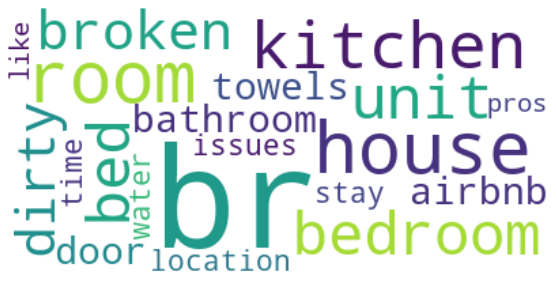

In [76]:
wc = WordCloud(background_color="white", max_words=20).generate_from_frequencies(tl_dict)
plt.figure(figsize=[10,5])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('topic1')
plt.show()


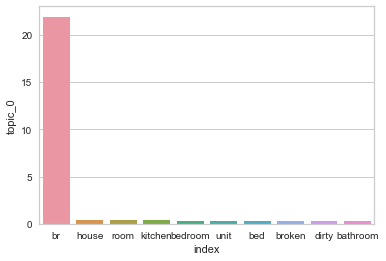

In [77]:
l_df = t1_10.to_frame()
l_df.reset_index(inplace=True)
sns.barplot(x='index', y='topic_0', data=l_df);

In [78]:
second_top = top_words(word_topic_matrix_df, 'topic_1', 100)
t2_10 = top_words(word_topic_matrix_df, 'topic_1', 10)

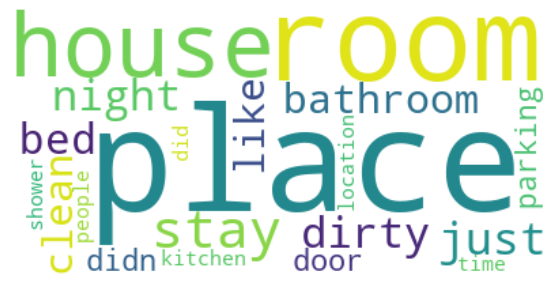

In [79]:
second_top_dict = second_top.to_dict()
wc = WordCloud(background_color="white", max_words=20).generate_from_frequencies(second_top_dict)
plt.figure(figsize=[10,5])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('topic2')
plt.show()


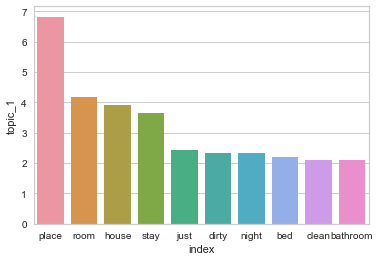

In [80]:
t2_df = t2_10.to_frame()
t2_df.reset_index(inplace=True)
sns.barplot(x='index', y='topic_1', data=t2_df);

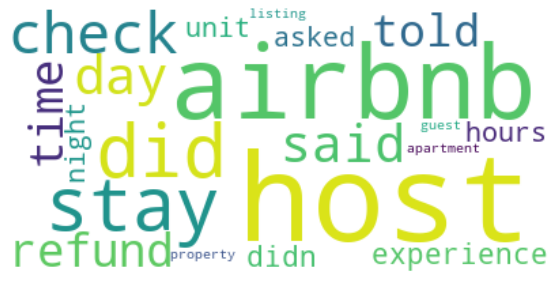

In [81]:
third_top = top_words(word_topic_matrix_df, 'topic_2', 100)
t3_10 = top_words(word_topic_matrix_df, 'topic_2', 10)


third_top_dict = third_top.to_dict()
wc = WordCloud(background_color="white", max_words=20).generate_from_frequencies(third_top_dict)
plt.figure(figsize=[10,5])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('topic3')
plt.show()

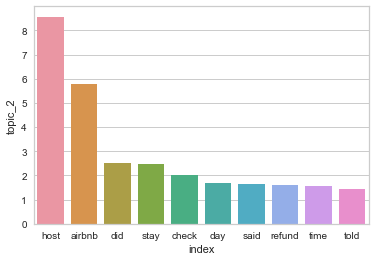

In [82]:
t3_df = t3_10.to_frame()
t3_df.reset_index(inplace=True)
sns.barplot(x='index', y='topic_2', data=t3_df);

## Build The LDA model With 5 Topics

In [83]:
lda_model_5 = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=doc_dict,num_topics=5, random_state=33,
                                           update_every=1,chunksize=15,passes=10,alpha='symmetric',iterations=100,
                                           per_word_topics=True)

pprint(lda_model_5.print_topics())

[(0,
  '0.031*"br" + 0.025*"place" + 0.024*"room" + 0.022*"clean" + 0.020*"bed" + '
  '0.018*"location" + 0.017*"dirty" + 0.016*"bathroom" + 0.016*"door" + '
  '0.015*"use"'),
 (1,
  '0.034*"host" + 0.021*"say" + 0.019*"stay" + 0.018*"go" + 0.017*"leave" + '
  '0.016*"day" + 0.016*"tell" + 0.015*"book" + 0.015*"even" + '
  '0.015*"experience"'),
 (2,
  '0.051*"stay" + 0.051*"check" + 0.048*"apartment" + 0.047*"place" + '
  '0.031*"host" + 0.027*"property" + 0.024*"night" + 0.024*"issue" + '
  '0.022*"owner" + 0.016*"recommend"'),
 (3,
  '0.053*"parking" + 0.052*"airbnb" + 0.034*"people" + 0.024*"check" + '
  '0.021*"car" + 0.020*"overall" + 0.016*"open" + 0.016*"park" + 0.016*"find" '
  '+ 0.015*"bit"'),
 (4,
  '0.041*"get" + 0.036*"time" + 0.023*"list" + 0.016*"unit" + 0.015*"work" + '
  '0.013*"home" + 0.012*"picture" + 0.012*"communication" + 0.012*"photo" + '
  '0.011*"refund"')]


## List of words by topic

In [84]:
topics_5 = lda_model_5.show_topics(formatted=False)

In [85]:
type(topics_5)

list

In [86]:
topics_5

[(0,
  [('br', 0.030749261),
   ('place', 0.025336718),
   ('room', 0.023902368),
   ('clean', 0.02159637),
   ('bed', 0.020186624),
   ('location', 0.018265879),
   ('dirty', 0.017006079),
   ('bathroom', 0.016402088),
   ('door', 0.015940892),
   ('use', 0.014523783)]),
 (1,
  [('host', 0.034039143),
   ('say', 0.021346342),
   ('stay', 0.018798089),
   ('go', 0.018095253),
   ('leave', 0.017036026),
   ('day', 0.015752574),
   ('tell', 0.015707118),
   ('book', 0.015209888),
   ('even', 0.015124027),
   ('experience', 0.014754907)]),
 (2,
  [('stay', 0.05108336),
   ('check', 0.05061631),
   ('apartment', 0.047853768),
   ('place', 0.046568338),
   ('host', 0.031296853),
   ('property', 0.027034197),
   ('night', 0.024372969),
   ('issue', 0.023815569),
   ('owner', 0.021780832),
   ('recommend', 0.016398089)]),
 (3,
  [('parking', 0.05333113),
   ('airbnb', 0.05241467),
   ('people', 0.03397957),
   ('check', 0.024268944),
   ('car', 0.020633401),
   ('overall', 0.020404061),
   ('